# 选择分析泰坦尼克号项目，首先了解titanic-data.csv数据集，这些数据可以回答的问题包括。

## 1. 有哪些因素会让船上的人生还率更高？

数据集中的因素包括：
1	Survived	生存	0 =否，1 =是
2	Pclass	票类	1 = 1，2 = 2，3 = 3
3	Sex	性别	
4	Age	年龄	
5	SibSp	泰坦尼克号上的兄弟姐妹/配偶	
6	Parch	泰坦尼克号上的父母/孩子的数量	
7	Ticket	票号	
8	Fare	乘客票价	
9	Cabin	客舱号码	
10	Embarked	登船港口	C =瑟堡，Q =皇后镇，S =南安普敦

### 我分析可能的因素为1、性别  2、年龄   3、票类/票价   4.孩子有父母和女性有配偶或兄弟生还率将增大


In [88]:
# 导入相关包数据
%pylab inline
import numpy as py
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)

Populating the interactive namespace from numpy and matplotlib


In [2]:
# 导入数据集
data = pd.read_csv('titanic-data.csv')

In [3]:
# 显示前三条数据
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


## 注意
我们需要对数据是否存在丢失值进行检查，查看是否存在缺失值:

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


## 分析
大部分数据的columns为891，说明“Age”,和“Cabin”、“Embarked”存在缺失，我需要在分析和"Cabin"、“Age”、“Embarked”有关的数据时，对此列的缺失值进行清理。清理方式是在分析和"Cabin"、“Age”、“Embarked”有关的数据时，选择性的删除缺失 值所在行。在后续的分析中，我将会在分析前删除缺失值所在行。

## 对Age和Fare数据进行分段处理

In [5]:
# 对Age进行分组，从0到90，每10岁分为一组，增加列‘Age_group’标记每行属于哪类。
bins = np.arange(0, 90, 10)
data['Age_group'] = pd.cut(data['Age'], bins)

In [6]:
# 对Fare进行分组,增加Fare_group列，标记票价的分类，总共分5类
bins_fare = [-1, 50, 100, 150, 200, 1000]
data['Fare_group'] = pd.cut(data['Fare'], bins_fare)

In [7]:
def ratio(data_cache, key_col):
    """分析分组人口数目及存活率，以饼图和柱状图输出"""
    # 返回key_col分组的存活率。同时打印各组的人口数目和存活比率
    group_cache = data_cache.groupby(key_col)
    # 分组中的人数
    ratio_count =  group_cache['PassengerId'].count()
    # 设置name
    ratio_count.name = ''
    #分组存活率
    result_ratio = group_cache['Survived'].mean() * 100
    
    # 开始画图
    plt.figure()
    plt.title('Population ratio in each group \n The total number is {} people'.format(data_cache.count()[key_col]))
    ratio_count.plot(kind='pie', autopct='%.0f%%')
    # 各组的存活率
    plt.figure()
    #分组类数量,用len()
    x = np.arange(len(result_ratio.index))+1   
    #设置y轴的数值，需将'Survived'列的数据先转化为数列，再转化为矩阵格式
    y = np.array(list(result_ratio))
    # 构建存活率的柱状图
    plt.bar(x, y, width = 0.35, align='center', alpha=0.8)
    plt.title(key_col + '-grouped survival rate')
    plt.ylabel('%')
    plt.xlabel(key_col)
    for a,b,c in zip(x, y, group_cache.size().index.values):    
        plt.text(a, b+0.05, '{}:{:.2f}%'.format(c, b), ha='center', va= 'bottom',fontsize=10)  
    plt.show()

## 以“Sex”列进行分组

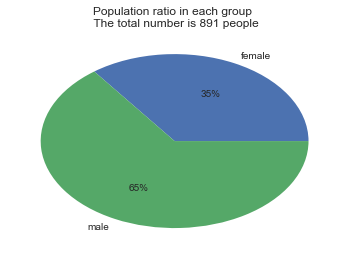

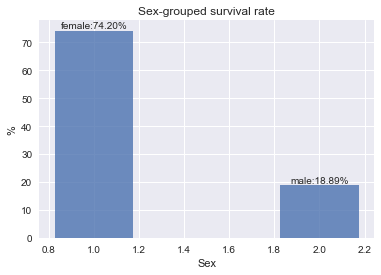

In [8]:
ratio(data, 'Sex')

## 分析
从上图得出,女性和男性的样本数是有意义的，女性的生还率是男性的3.5倍还要多，所以猜测女性有更高的生还机会，猜测主要由于英国男人比较绅士，把生的机会让给女性。

## 以“Fare”（票价）列进行分组

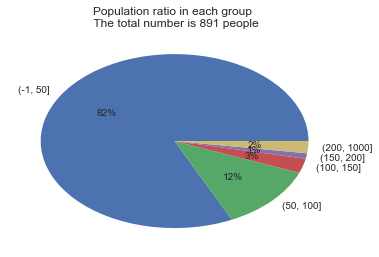

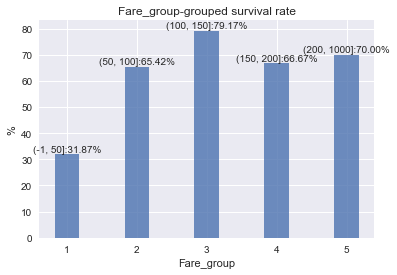

In [9]:
# 分类中Fare类别生存率
ratio(data, 'Fare_group')

## 分析
从上图得出,虽然票价在200以上的乘客的人数比较少，但是整体趋势是一直的，各个分组的样本数是有意义的，票价低于50元的乘客人数比较多，说明50以下是一个低票价，50元以上票价的乘客，是更加富有的人，人数占比18%，生还率相比票价低于50的乘客高出2倍数。所以推断富有的人员生还率更高。


## 以“Pclass”列进行分组

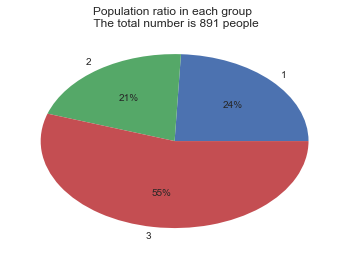

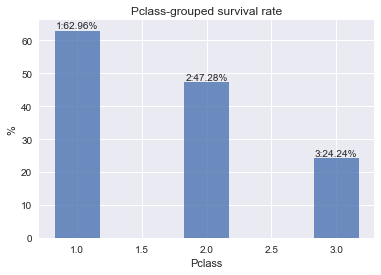

In [10]:
# 以“Pclass”列进行分组
ratio(data, 'Pclass') 

## 分析
从上图得出,各个分组的样本数是有意义的，从数据看一二等仓的生还率较高，比三等仓分别高出2.6倍和2倍，所以推断富有的人生还率更高。

## 以“Embarked”列进行分组

## 此时，需要对"Embarked"列的数据进行清理。

In [11]:
# 删除Embarked==NaN的行,得到数据集data_mu_Embarked
data_mu_Embarked = data.dropna(subset = ['Embarked'])
data_mu_Embarked.count()['PassengerId']

889

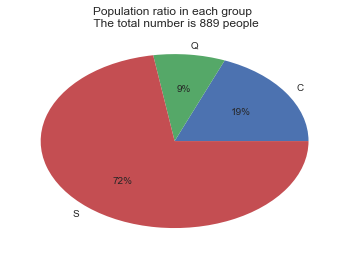

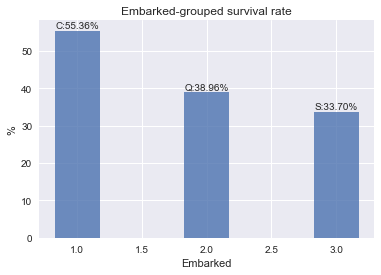

In [12]:
# 分类中Embarked类别生存率
ratio(data_mu_Embarked, 'Embarked') 

## 分析
从上图得出,各个分组的样本数是有意义的，不同的港口，生还率相近

## 以“Age”列进行分组
## 此时，需要对"Age"列的数据进行清理。

In [13]:
# 删除Age==NaN的行,得到数据集data_mu_age
data_mu_age = data.dropna(subset = ['Age'])
data_mu_age.count()['PassengerId']

714

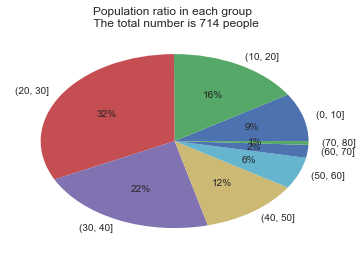

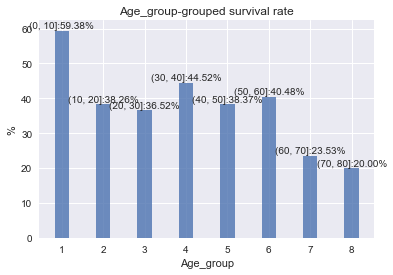

In [14]:
# 利用data_mu_age数据集分析以年龄Age_group分组的情况
ratio(data_mu_age, 'Age_group') 

## 分析
从图中得出，10岁以下乘客的生还率高于10-60岁的0.5到1倍，60岁以上的生还率低于平均值0.5倍，在观察10岁以下和60以上乘客的人数，其分组样本有意义。分析原因可能是人们对于物质延续的本能，长者把生还的机会让给年轻人和孩子，年轻人把生还的机会让给孩子。所以导致的此种情况。

# 下面我将会使用三个变量 'Pclass', 'Sex', 'Age_group'分析生还率，如果各组的分类过多，使数据过于分散，所以根据上面的分析，'Age'的生还率分组可以分为三个类别，并不影响结果，所以分为10岁以下的，10岁到60岁的，60岁以上的。

# 将data_mu_age数据集的'Age'分为三组处理

In [16]:
# 对Age进行分组，分为10岁以下的，10岁到60岁的，60岁以上的
bins_three = [0, 10, 60, 120]
data_mu_age.loc[:,'Age_group']= pd.cut(data_mu_age['Age'], bins_three)

In [99]:
def ratio_three(data_cache, key_1, key_2, key_3):
    """分析三个变量分组人口数目及存活率，以饼图和柱状图输出"""
    # 返回key_1, key_2, key_3分组的存活率。同时打印各组的人口数目和存活比率key1=Sex
    
    # subset data by Sex
    data_male = data_cache[data_cache[key_1] == 'male']
    data_female = data_cache[data_cache[key_1] == 'female']
    
    # 开始绘图，包括男性人数和生还率
    plt.figure()
    data_male.groupby([key_2, key_3]).size().unstack().plot(kind='bar', stacked=False)
    plt.title( '{} and {} count for male passengers'.format(key_2, key_3))
    plt.ylabel('Count') 
    (data_male.groupby([key_2, key_3]).mean()['Survived'].unstack() * 100).plot(kind='bar', stacked=False)
    plt.title( '{} and {} survival rate for male passengers'.format(key_2, key_3))
    plt.ylabel('rate  %')   
    plt.show()
    
    # 开始绘图，包括女性人数和生还率
    plt.figure()
    data_female.groupby([key_2, key_3]).size().unstack().plot(kind='bar', stacked=False)
    plt.title( '{} and {} count for female passengers'.format(key_2, key_3))
    plt.ylabel('Count')    
    (data_female.groupby([key_2, key_3]).mean()['Survived'].unstack() * 100).plot(kind='bar', stacked=False)
    plt.title( '{} and {} survival rate for female passengers'.format(key_2, key_3))
    plt.ylabel('rate  %')   



<Figure size 432x288 with 0 Axes>

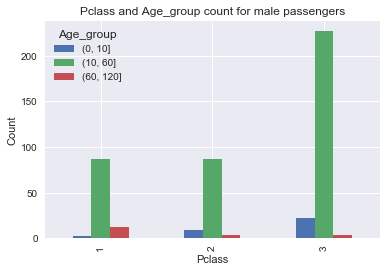

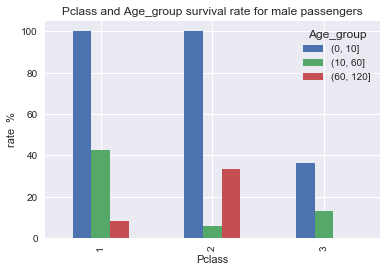

<Figure size 432x288 with 0 Axes>

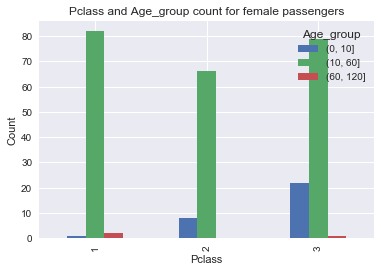

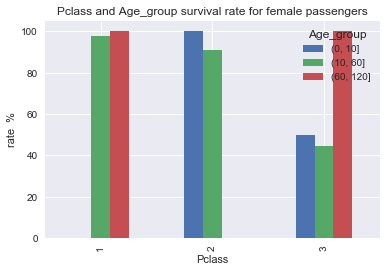

In [100]:
ratio_three(data_mu_age, 'Sex', 'Pclass', 'Age_group')

## 结论：

## 对数据进行缺失值清理后，根据生还比率和该分组的人数分析，从图中推论富有的女性和孩子生还率高。其中孩子的分组中人数比较少，考虑由于本身船上10以下的孩子比较少，并且所以有关10岁以下富有的孩子的分组，生还率都很高，所以认为以上假设成立。由于其中的限制条件和位置因素很多，例如随行人员的影响，所以此次只是从部分数据中推论如此，此次的数据表现的只是相关性，并无因果关系，随着分析的完善，可能会有更多的发现。